# * A Fine Windy Day

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Training set feature engineering ,selection ,scaling

In [2]:
dataset=pd.read_csv('train.csv')

In [3]:
dataset=dataset.drop(['tracking_id','datetime'],axis=1)

In [4]:
cat_feat=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']

In [5]:
for feature in cat_feat:
    dataset[feature].fillna('Missing',inplace=True)

In [6]:
top_15=dataset.turbine_status.unique()

In [7]:
for label in top_15:
    dataset[label+'_turbine_status']=np.where(dataset.turbine_status==label,1,0)

In [8]:
top_4=dataset.cloud_level.unique()

In [9]:
for label in top_4:
    dataset[label+'_cloud_level']=np.where(dataset.cloud_level==label,1,0)

In [10]:
dataset.drop(['Missing_cloud_level','Missing_turbine_status'],axis=1,inplace=True)

In [11]:
dataset.drop(cat_feat,axis=1,inplace=True)

In [12]:
for feature in dataset.columns :
    median_val=dataset[feature].median()
    dataset[feature].fillna(median_val,inplace=True)

In [13]:
y_train=dataset['windmill_generated_power(kW/h)']
X_train=dataset.drop('windmill_generated_power(kW/h)',axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

In [15]:
X_train.shape

(28200, 34)

<AxesSubplot:>

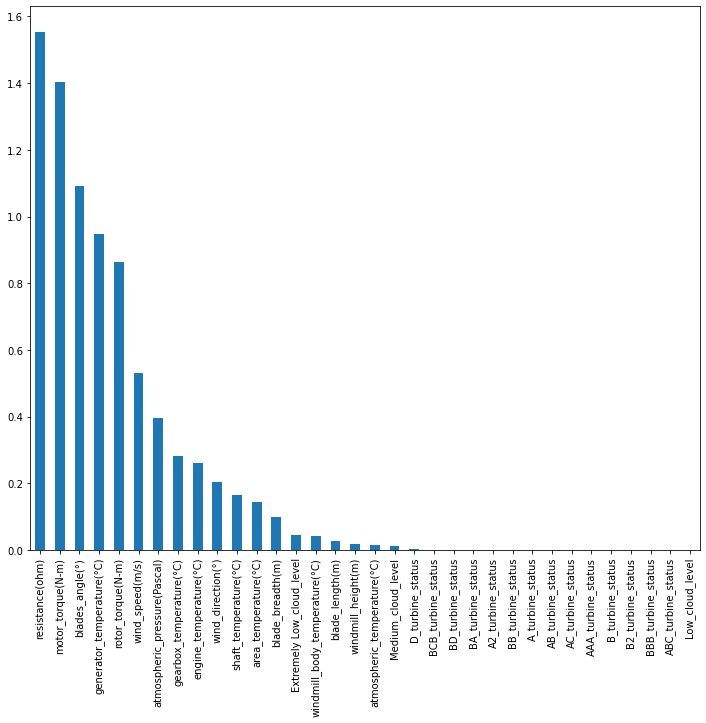

In [16]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(X_train,y_train)
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
plt.figure(figsize=(12,10))
mutual_info.sort_values(ascending=False).plot.bar()

In [17]:
from sklearn.feature_selection import SelectKBest
sel_fifteen=SelectKBest(mutual_info_regression,k=16)
sel_fifteen.fit(X_train,y_train)

SelectKBest(k=16,
            score_func=<function mutual_info_regression at 0x0000023D3F1915E0>)

In [18]:
sel_fifteen.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True])

In [19]:
arr=X_train.columns[sel_fifteen.get_support()]

In [20]:
X_train=X_train[arr]

In [21]:
X_train

,wind_speed(m/s),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),Extremely Low_cloud_level
0,0.336418,0.060191,0.181827,0.947796,-0.014961,1.030403,0.587276,0.300032,-0.757760,0.384560,-0.496667,2.389249,0.501119,-0.024772,-1.360164,-0.10352
1,2.272290,-5.112879,-1.872976,0.070475,0.595157,0.799731,0.661182,-0.183652,0.917324,0.384560,0.306940,0.423421,2.550540,0.170278,0.837934,-0.10352
2,0.345171,0.065060,0.465785,0.029643,0.043103,-0.065212,0.132452,-0.188720,0.438902,0.427443,-0.594845,0.187222,-2.146652,0.024356,-1.552191,-0.10352
3,2.232610,0.196974,0.517368,0.085470,0.762265,1.423452,1.532367,-0.174363,1.724590,0.423510,1.569477,0.804741,0.521672,0.233608,-0.492318,-0.10352
4,-0.770978,0.069681,0.236690,-1.343141,0.139671,-1.123965,-1.393440,0.361997,0.238581,-2.322138,-0.337448,-0.823587,-0.392642,0.096184,0.917716,-0.10352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,0.335703,0.195335,0.313387,-0.964522,0.965779,1.306710,1.305685,-0.170224,1.647893,0.412344,1.930471,0.838589,0.620227,0.029726,0.344207,-0.10352
28196,0.328211,0.072909,-1.872976,0.074603,0.142624,0.600791,0.364136,-0.186085,-0.985611,0.400397,0.440414,0.284035,0.341979,-0.560013,1.051102,-0.10352
28197,0.327733,0.180810,0.400800,0.191239,0.233214,1.318872,1.503328,-0.172155,1.608976,0.399635,1.914552,0.778311,1.941061,0.096184,-0.277716,-0.10352
28198,0.344455,0.292136,0.264668,0.925656,0.360392,1.269276,1.267604,-0.176205,1.670571,0.426302,2.195463,0.813876,0.671726,0.051994,-0.830666,-0.10352


# Test set Feature Engineering,scaling and selection

In [22]:
dataset=pd.read_csv('test.csv')

In [23]:
dataset.drop(['tracking_id','datetime'],axis=1,inplace=True)

In [24]:
cat_feat=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']

In [25]:
for feature in cat_feat:
    dataset[feature].fillna('Missing',inplace=True)

In [26]:
top_15=dataset.turbine_status.unique()

In [27]:
for label in top_15:
    dataset[label+'_turbine_status']=np.where(dataset.turbine_status==label,1,0)

In [28]:
top_4=dataset.cloud_level.unique()

In [29]:
for label in top_4:
    dataset[label+'_cloud_level']=np.where(dataset.cloud_level==label,1,0)

In [30]:
dataset.drop(['Missing_cloud_level','Missing_turbine_status'],axis=1,inplace=True)

In [31]:
dataset.drop(cat_feat,axis=1,inplace=True)

In [32]:
for feature in dataset.columns :
    median_val=dataset[feature].median()
    dataset[feature].fillna(median_val,inplace=True)

In [33]:
X_test=dataset

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

In [35]:
X_test=X_test[arr]

In [36]:
X_test.shape

(12086, 16)

Train set and test set are ready now

# Model Deployment and Prediction

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn.metrics import r2_score
pred=rf_model.predict(X_train)
print(r2_score(pred,y_train))

0.992816393277352


In [38]:
y_pred

array([ 2.69269084,  2.39545072,  3.40026837, ...,  5.18298709,
        5.34615949, 10.57148706])

In [39]:
org=pd.read_csv('test.csv')
rem=org.iloc[:,:2]
y_pred=pd.DataFrame(y_pred)
y_pred.rename(columns={0:'windmill_generated_power(kW/h)'},inplace=True)
final_ans=pd.concat([rem, y_pred], axis=1)

In [40]:
import os
path='E:\\Machine Learning\\A Fine Windy Day\\Model results\\'
final_ans.to_csv(os.path.join(path,r'final_sub.csv'))